# Predicting EV Scooter Battery Degradation Using Linear Regression

This notebook demonstrates how to predict battery degradation in electric scooters using linear regression.

**Features:**
- Daily distance traveled (km)
- Number of charge cycles
- Average temperature (°C)

We will generate synthetic data and apply the least squares regression method.

In [10]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)

In [11]:
# Generate synthetic data
n_samples = 200
daily_distance = np.random.normal(25, 7, n_samples)  # km per day
charge_cycles = np.random.normal(300, 50, n_samples)  # cycles
avg_temp = np.random.normal(30, 5, n_samples)  # Celsius

# True coefficients for synthetic data
coef_distance = -0.08
coef_cycles = -0.15
coef_temp = -0.05
intercept = 100

# Battery degradation formula (target: remaining battery % after 2 years)
noise = np.random.normal(0, 2, n_samples)
battery_remaining = (intercept +
                     coef_distance * daily_distance +
                     coef_cycles * (charge_cycles / 100) +
                     coef_temp * avg_temp +
                     noise)

data = pd.DataFrame({
    'daily_distance': daily_distance,
    'charge_cycles': charge_cycles,
    'avg_temp': avg_temp,
    'battery_remaining': battery_remaining
})
data.head()

,daily_distance,charge_cycles,avg_temp,battery_remaining
0,28.476999,317.889368,22.027862,97.657590
1,24.032150,328.039226,27.003125,94.390882
2,29.533820,354.152562,30.026218,97.343966
3,35.661209,352.690103,30.234903,97.817599
4,23.360926,231.116532,27.749673,97.223837


In [12]:
# Save data to CSV
data.to_csv('sample_data.csv', index=False)
print('Data saved to sample_data.csv')

Data saved to sample_data.csv


In [13]:
# Fit linear regression model
X = data[['daily_distance', 'charge_cycles', 'avg_temp']]
y = data['battery_remaining']

model = LinearRegression()
model.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', dict(zip(X.columns, model.coef_)))

Intercept: 99.2600881741024
Coefficients: {'daily_distance': -0.051556851620861786, 'charge_cycles': -0.0058924425146994405, 'avg_temp': -0.0029457511592665096}


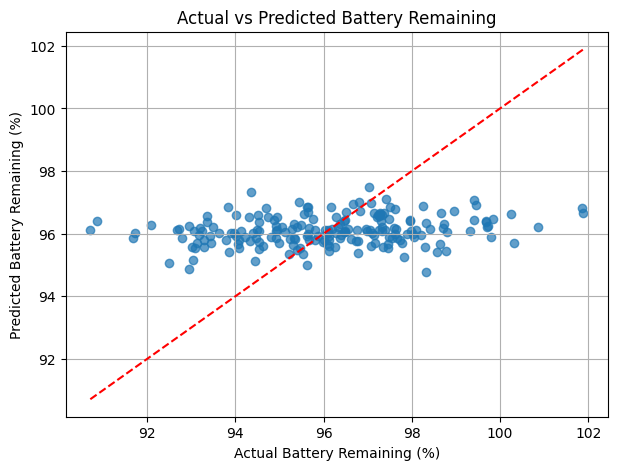

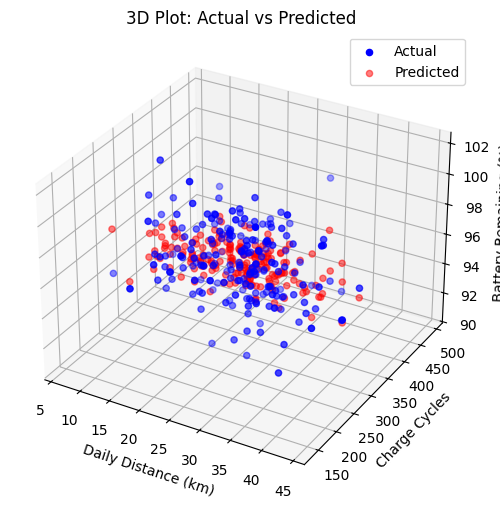

In [14]:
# Predict and visualize results
y_pred = model.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel('Actual Battery Remaining (%)')
plt.ylabel('Predicted Battery Remaining (%)')
plt.title('Actual vs Predicted Battery Remaining')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()

# 3D plot for two features (daily_distance, charge_cycles)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['daily_distance'], data['charge_cycles'], y, c='b', label='Actual')
ax.scatter(data['daily_distance'], data['charge_cycles'], y_pred, c='r', alpha=0.5, label='Predicted')
ax.set_xlabel('Daily Distance (km)')
ax.set_ylabel('Charge Cycles')
ax.set_zlabel('Battery Remaining (%)')
ax.legend()
plt.title('3D Plot: Actual vs Predicted')
plt.show()

3D plot saved to plot3D.png


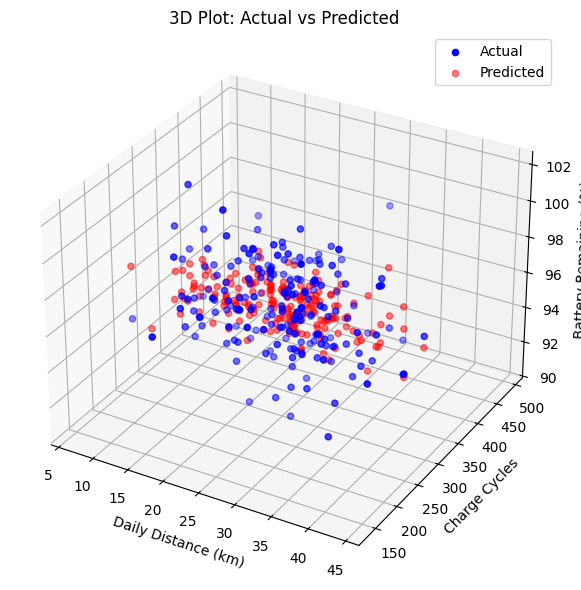

In [15]:
# Save the 3D plot to file
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['daily_distance'], data['charge_cycles'], y, c='b', label='Actual')
ax.scatter(data['daily_distance'], data['charge_cycles'], y_pred, c='r', alpha=0.5, label='Predicted')
ax.set_xlabel('Daily Distance (km)')
ax.set_ylabel('Charge Cycles')
ax.set_zlabel('Battery Remaining (%)')
ax.legend()
plt.title('3D Plot: Actual vs Predicted')
plt.tight_layout()
plt.savefig('plot3D.png')
print('3D plot saved to plot3D.png')
plt.show()

In [16]:
# Save the 2D plot to file
plt.figure(figsize=(7,5))
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel('Actual Battery Remaining (%)')
plt.ylabel('Predicted Battery Remaining (%)')
plt.title('Actual vs Predicted Battery Remaining')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.savefig('plot.png')
print('Plot saved to plot.png')
plt.close()

Plot saved to plot.png


## Summary and Interpretation

- We generated synthetic data for EV scooter battery degradation based on daily distance, charge cycles, and average temperature.
- Applied least squares linear regression to predict remaining battery percentage after 2 years.
- The model coefficients indicate the impact of each feature on battery health.
- Visualization shows a good fit between actual and predicted values, demonstrating the effectiveness of linear regression for this synthetic scenario.